# Registration

Linear and nonlinear registration can be conducted in `nlreg1d` using the `register_linear` and `register_srsf` functions, respectively. The latter is a wrapper to the square root velocity framework registration procedure in the [fdasrsf](https://github.com/jdtuck/fdasrsf_python) package.  Let's use the `Dorn2012` dataset to demonstrate these procedures.

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
import nlreg1d as nl

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


### Load data

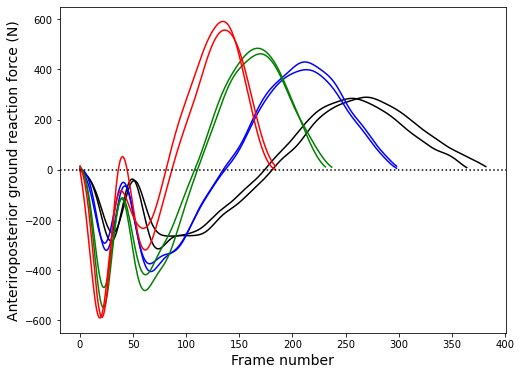

In [2]:
dataset = nl.data.Dorn2012()
speed   = dataset.group  # running speed
y       = dataset.dv     # dependent variable (anterioposterior ground reaction forces)

def plot_Dorn2012(y, xlabel='Frame number', ylabel='Anteriroposterior ground reaction force (N)', title=None):
    plt.figure( figsize=(8,6) )
    ax      = plt.axes()
    colors  = ['k', 'b', 'g', 'r']
    for i,c in enumerate(colors):
        for yy in y[speed==i]:
            ax.plot(yy, color=c)
    ax.axhline(0, color='k', ls=':')
    ax.set_xlabel(xlabel, size=14)
    ax.set_ylabel(ylabel, size=14)
    if title is not None:
        ax.set_title(title)
    plt.show()
    

plot_Dorn2012( y )




### Linear registration

Note that each observation has a different number of frames. The data can be linearly registered (i.e., interpolated to a common number of frames) using `register_linear`:

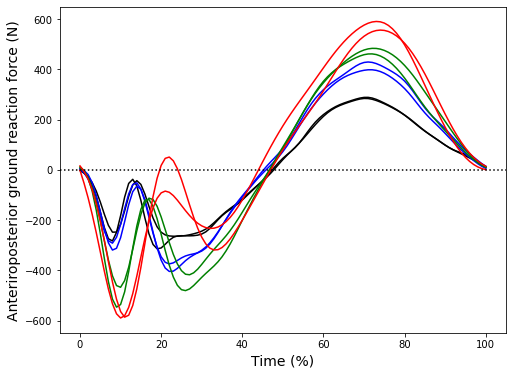

In [3]:
yi = np.array( [nl.register_linear(yy, n=101)   for yy in y] )

plot_Dorn2012( yi, xlabel='Time (%)' )


### Nonlinear registration

Note that the local extrema (local minima and local maxima) do not align in time. This misalignment can be improved using nonlinear registration:

Initializing...
Compute Karcher Mean of 8 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
maximal number of iterations is reached


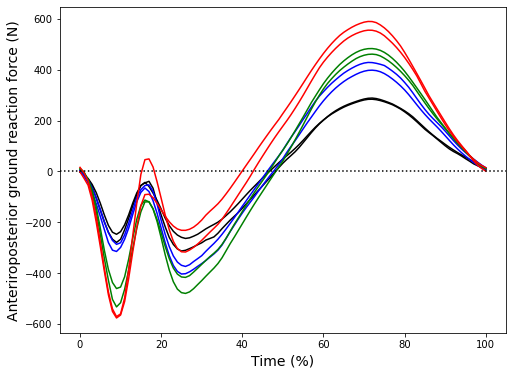

In [4]:
yr,wf = nl.register_srsf(yi, MaxItr=5)

plot_Dorn2012( yr, xlabel='Time (%)' )

The optimal warp functions are returned as an array, but can be converted to a `Warp1DList` object for more convenient processing:

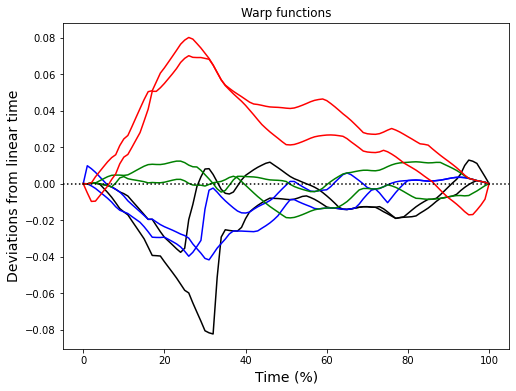

In [5]:

wlist = nl.Warp1DList(wf)
d     = wlist.get_deviation_from_linear_time()

plot_Dorn2012( d, xlabel='Time (%)', ylabel='Deviations from linear time', title='Warp functions' )
